# Keras를 이용한 Classification 과 Regression 예제
---


# <br></br>
## 1. Classification
---


이번 실험에서는 0에서 9까지의 필기체 숫자를 인식하는 MNIST classification 예제를 다룹니다. 

MNIST data의 input은 28x28 pixel로 이루어진 이미지 파일이고, 이미지의 각 pixel에 해당하는 값 하나가 input node에 해당합니다.

따라서 이 예제에서의 **input node**의 개수는 28x28 = **784개**가 됩니다. 0부터 9까지의 숫자 중 하나를 인식하므로 **output layer node**의 수는 **10개**가 될 것입니다.

Input layer와 output layer 사이에 많은 hidden layer가 있을수록, 즉 더 깊은 신경망으로 구현할수록 성능은 높아지지만, 본 예제에서는 간단히 1개의 hidden layer만 사용합니다.

Hidden layer에 들어가는 node의 개수에 따라서도 학습에 필요한 시간과 예측의 정확성이 달라지게 됩니다.

![First_layer](./layer.png)
## <br></br>
### MNIST data 불러오기
---

아래의 코드는 MNIST 데이터를 불러온 후, 학습하기 좋은 형태로 변환하는 과정을 포함하는 함수입니다.

이제부터 코드가 들어있는 cell마다 **Ctrl + Enter** 혹은 **Shift + Enter**를 눌러서 각각의 코드를 실행합니다.

In [1]:
import numpy as np
from keras import datasets        #mnist data를 불러오기 위한 library
from keras.utils import np_utils  #to_categorical 불러오기 위한 library


def Data_function():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() #train data와 test data 각각 불러오기
    
    Y_train = np_utils.to_categorical(y_train) # to_categorical() : 0-9 사이의 출력값 -> 이진벡터 (분류 작업 효율이 더 좋음)
                                               # Ex) [1 9] -> [[0 1 0 0 0 0 0 0 0 0],[0 0 0 0 0 0 0 0 0 1]]
    Y_test = np_utils.to_categorical(y_test)
    L, W, H = X_train.shape            # L: sample의 개수 60000개, W: width = 28, H: height = 28
    X_train = X_train.reshape(-1, W*H) # [28x28] matrix를 1 by 784 인 matrix로 reshape 
                                       # -1을 row의 input으로 넣으면 열에 대응하는 row의 개수가 자동으로 입력
    print(X_train[1].shape)
    X_test = X_test.reshape(-1, W*H)
    
    X_train = X_train / 255.0          # 0에서 255 사이의 값을 가지는 element를 0에서 1 사이의 실수로 normalize 시키는 과정
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

Using TensorFlow backend.


### 모델 구성하기
---
본 예제에서는 Keras의 특성을 가장 잘 살려주는 Sequential model로 구성합니다.

더 깊은 신경망을 구현하고 싶다면 output layer 전에 model.add()함수를 통해 hidden layer를 더 쌓으면 된답니다.

NN_model 함수는 **Nin**, **Nh**, **Nout** 을 input으로 가지는데 각각은 **input layer node의 수**, **hidden layer node의 수**, **output layer node의 수**를 의미합니다.

In [5]:
from keras import layers, models

#Dense -> 입출력을 연결해주는 함수

def NN_model(Nin, Nh, Nout):
    model = models.Sequential()                                  # Sequantial() 함수로 모델 초기화
    model.add(layers.Dense(Nh,input_dim=Nin,activation='relu'))  # add()를 통해 layer층을 쌓음 
                                                                 # relu로 activation 함수 정의
                                                                 # Nh: 출력 뉴런 수, input_dim (Nin): 입력 뉴런 수
            
    model.add(layers.Dense(Nh,input_dim=Nh,activation='relu'))  # add()를 통해 layer층을 쌓음 
                                                                 # relu로 activation 함수 정의
                                                                 # Nh: 출력 뉴런 수, input_dim (Nin): 입력 뉴런 수
            
    model.add(layers.Dense(Nout,activation='softmax'))           # Nout: 출력 뉴런 수, softmax: 다중 클래스 분류
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #cross entropy를 loss function으로 지정, optimizer 지정, 성능 검증을 위해 accuracy도 측정하기 위해 metrics 지정
    return model

### Plot 함수 만들기
---
학습이 진행되는 동안 train data와 validation data에 대한 loss function 값의 변화와 예측 정확도를 그림으로 표현하는 함수입니다. Matlab 소프트웨어의 plot과 관련된 대부분의 함수를 비슷하게 사용할 수 있습니다.

In [6]:
import matplotlib.pyplot as plt

def plot_loss(hist):
    plt.plot(hist.history['loss']) 
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0) # loc은 legend의 위치. 0을 입력하면 적절한 위치에 자동으로 들어갑니다.
    
def plot_acc(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc=0)

### Main 함수
---
위에서 구현한 함수들의 입력 및 출력값이 정의된 메인함수입니다. epochs와 batch_size를 조정한 후, 결과를 비교해보기 바랍니다.

(784,)
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 57us/step - loss: 0.2326 - acc: 0.9312 - val_loss: 0.1172 - val_acc: 0.9652
Epoch 2/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.0841 - acc: 0.9739 - val_loss: 0.0876 - val_acc: 0.9727
Epoch 3/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.0542 - acc: 0.9827 - val_loss: 0.1038 - val_acc: 0.9686
Epoch 4/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0924 - val_acc: 0.9736
Epoch 5/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0916 - val_acc: 0.9765
Epoch 6/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.0240 - acc: 0.9919 - val_loss: 0.0955 - val_acc: 0.9753
Epoch 7/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.0181 - acc: 0.9943 - val_loss: 0.0950 - 

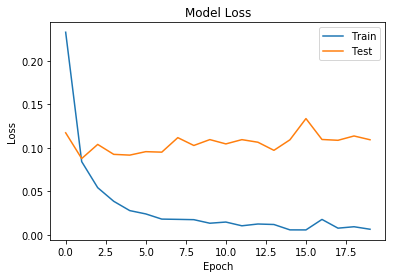

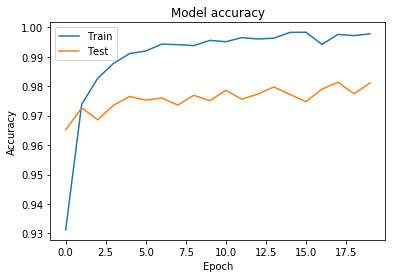

In [9]:
def main():
    Nin = 784            # input node: [28x28] = 784
    Nh = 500             # hidden layer node: 임의로 100으로 설정
    number_of_class = 10 # 0에서 9까지 10종류의 출력으로 분류
    Nout = number_of_class 
    
    model = NN_model(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_function()
    
    hist = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2) # model training
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)                  # model evaluation
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(hist)
    plt.show()
    plot_acc(hist)
    plt.show()
    
if __name__ == '__main__':
    main()

## <br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br>
## 2. Regression
---
Regression은 정해진 class 중 하나를 선택하는 Classification과 달리 **continuous한 예측값**을 출력합니다. 

이번 예제에서는 Boston의 집값을 결정하는 13가지 요인과 실제 가격에 대한 데이터로 학습한 후, 13가지 요인으로만 집값을 예측할 수 있는 regression model을 만들어봅니다.

## <br></br>
### Boston housing data 불러오기
---

Boston housing data는 보스턴의 집값을 결정할 것이라 예상되는 13가지의 attribute을 가지는 X와 그에 대한 집값 Y의 데이터로 구성되어 있습니다.

13개의 Attribute 중에는 CRIM(per capita crime rate by town), TAX(full-value property-tax rate per $10,000) 등이 있습니다.

Max값과 Min값을 각각 1과 0으로 normalization해주는 MinMaxScale()함수가 사용됩니다.

In [ ]:
from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train) # fit_transform()을 이용하여 X_train data를 0과 1 사이의 값으로 normalization
    X_test = scaler.transform(X_test)       # 윗줄에서 fit_transform으로 정규화된 데이터를 기준으로 transform

    return (X_train, y_train), (X_test, y_test)

#### fit_transform()과 transform()의 차이
---
데이터를 normalization 하기 위해서는 보통 입력 data를 training data와 test data로 나누기 전에 Max값과 Min값을 찾은 후, 이 값들을 기준으로 normalization 해야 합니다.

그러나, 이미 training과 test로 나누어진 상태에서 데이터를 각각 normalization 하게 되면 train의 Max값인 1과 test의 Max값인 1은 서로 다른 값을 의미하게 됩니다.

그러한 차이가 생기지 않도록 하기 위해 fit_transform()을 먼저 사용한 후, transform()을 합니다.

아래의 코드를 실행시켜보면 그 차이에 대해 알 수 있습니다.

In [ ]:
from sklearn import preprocessing
import numpy as np

X_train = np.array([[1.],[2.],[3.]])
X_test = np.array([[0.],[2.],[3.]])

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

### 모델 구성하기
---
classification 모델과의 차이는 **output layer에서 activation 함수를 쓰지 않는다**는 점입니다. 즉, 마지막 hidden layer의 출력값을 그대로 output layer의 input에 넣게 됩니다.

주석 처리한 함수는 2 개의 hidden layer와 Dropout을 적용한 코드입니다. Dropout와 overfitting에 대한 관계를 생각하고 실험하기 바랍니다.

In [ ]:
from keras import layers, models

# 2개의 hidden layer와 dropout을 적용한 Neural network
# def NN2(Nin, Nh, Drop, Nout):                        
#     model = models.Sequential()
#     model.add(layers.Dense(Nh[0],input_dim=Nin,activation='relu',name='hidden_1'))
#     model.add(layers.Dropout(Drop[0]))
#     model.add(layers.Dense(Nh[1],input_dim=Nin,activation='relu',name='hidden_2'))
#     model.add(layers.Dropout(Drop[1]))
#     model.add(layers.Dense(Nout))
#     model.compile(loss='mse', optimizer='sgd')
    
#     return model

def NN2(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh,input_dim=Nin,activation='relu'))
    model.add(layers.Dense(Nout))
    model.compile(loss='mse', optimizer='sgd')
    
    return model

### Main 함수
---
위에서 구현한 함수들의 입력과 출력값을 정의한 메인함수입니다. loss function의 plot은 classification 예제에서 구현해놓은 함수를 사용합니다.

plot_loss(hist)에서 에러가 난다면 plot_loss 함수가 속해있는 cell을 실행하고 와야 합니다.

In [ ]:
def main():
    Nin = 13
#     Nh = [10, 5]         ## 2개의 hidden layer함수를 이용하려면 주석 해제하고 바로 아랫줄 코드는 주석처리 필요
    Nh = 10
    Nout = 1
    Drop = [0.1, 0.1]      # 임의로 설정한 각 hidden layer 층별 dropout rate
#     model = NN2(Nin, Nh, Drop, Nout)  ## 2개의 hidden layer함수를 이용하려면 주석 해제하고 바로 아랫줄 코드는 주석처리 필요
    model = NN2(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
        
    hist = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))
    
    plot_loss(hist)
    plt.show()
    
if __name__ == '__main__':
    main()